# Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

##Gabriel Felipe de Castro Barbosa.
##Projeto DataScience
### Análise exploratória com Python.

## Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
## Conferindo as versões utilizadas
import pandas as pd
import seaborn as sns
import scipy as stats
import numpy as np
import matplotlib.pyplot as plt


print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % stats.__version__)

Usando pandas 1.1.4
Usando seaborn 0.11.0
Usando scipy 1.4.1


# TRATAMENTO DOS DADOS

In [2]:
# ---> Importando bases
movies = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv")
ratings = pd.read_csv("ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
print("Carregamos %d filmes" % len(movies))
if(len(movies) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


In [6]:
# ---> Renomeando colunas
movies.columns = ["FILME_ID","TITULO","GENEROS"]
ratings.columns = ["USUARIO_ID","FILME_ID","NOTA","MOMENTO"]
movies.index = movies.FILME_ID

In [7]:
# ---> Extraindo ano de lançamento
ANO_LANCAMENTO = movies.TITULO.str.extract("\((\d{4})\)")
movies['ANO_LANCAMENTO'] = ANO_LANCAMENTO.astype(float) #Incluindo valores de uma série a um DataFrame, A relação é feita diretamente pelo Index.
movies.head()

,FILME_ID,TITULO,GENEROS,ANO_LANCAMENTO
FILME_ID,,,,
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,5,Father of the Bride Part II (1995),Comedy,1995.0



## Pergunta: gere uma nova feature, a média dos votos por filme; remova os filmes com menos de 50 avaliações

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

  **Dica:
    - como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados


### Calculando campos média e quantidade de avaliações 

In [8]:
join_movies_ratings = movies.join(ratings.set_index("FILME_ID"), how = "left")
'''
O join pode ser feito direto quando ambos os DataFrames possuem o mesmo index, ou também pode ser indicado
qual coluna do primeiro DataFrame que irá se unir ao Index do segundo DataFrame.
'''
join_movies_ratings.head()

,FILME_ID,TITULO,GENEROS,ANO_LANCAMENTO,USUARIO_ID,NOTA,MOMENTO
FILME_ID,,,,,,,
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,5.0,4.0,8.474350e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,7.0,4.5,1.106636e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,15.0,2.5,1.510578e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,17.0,4.5,1.305696e+09


In [10]:
nota_media_filmes = join_movies_ratings.groupby("TITULO")["FILME_ID","NOTA"].mean()
nota_media_filmes = nota_media_filmes.sort_values("NOTA",ascending= False)
nota_media_filmes.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,FILME_ID,NOTA
TITULO,,
Gena the Crocodile (1969),175293.0,5.0
True Stories (1986),7815.0,5.0
Cosmic Scrat-tastrophe (2015),146684.0,5.0
Love and Pigeons (1985),130978.0,5.0
Red Sorghum (Hong gao liang) (1987),2972.0,5.0
"Thin Line Between Love and Hate, A (1996)",626.0,5.0
Lesson Faust (1994),1151.0,5.0
Eva (2011),94810.0,5.0
Who Killed Chea Vichea? (2010),152711.0,5.0


In [11]:
#Removendo campo FILME_ID do index em join_movies_ratings
join_movies_ratings.index = range(0,len(join_movies_ratings))

In [12]:
qtd_avaliacoes = join_movies_ratings.groupby("FILME_ID")["NOTA"].count()
media_avaliacoes = ratings.groupby("FILME_ID")["NOTA"].mean()

In [13]:
movies["QTD_AVALIACOES"] = qtd_avaliacoes
movies["MEDIA_AVALIACOES"] = media_avaliacoes

In [14]:
movies.head(50)

,FILME_ID,TITULO,GENEROS,ANO_LANCAMENTO,QTD_AVALIACOES,MEDIA_AVALIACOES
FILME_ID,,,,,,
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,215,3.920930
2,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,110,3.431818
3,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,52,3.259615
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,7,2.357143
5,5,Father of the Bride Part II (1995),Comedy,1995.0,49,3.071429
6,6,Heat (1995),Action|Crime|Thriller,1995.0,102,3.946078
7,7,Sabrina (1995),Comedy|Romance,1995.0,54,3.185185
8,8,Tom and Huck (1995),Adventure|Children,1995.0,8,2.875000
9,9,Sudden Death (1995),Action,1995.0,16,3.125000


## Separando a coluna `generos` em diversas colunas.

In [15]:
movies['GENEROS'] = movies['GENEROS'].str.replace('-', '')
generos = movies['GENEROS'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 20 generos distintos


In [16]:
movies = movies.join(generos).drop(columns=['GENEROS'], axis=1)
movies.head()

,FILME_ID,TITULO,ANO_LANCAMENTO,QTD_AVALIACOES,MEDIA_AVALIACOES,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
FILME_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,Toy Story (1995),1995.0,215,3.920930,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,Jumanji (1995),1995.0,110,3.431818,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,Grumpier Old Men (1995),1995.0,52,3.259615,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Waiting to Exhale (1995),1995.0,7,2.357143,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,5,Father of the Bride Part II (1995),1995.0,49,3.071429,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## DATAFRAME Apenas filmes com mais de 50 avaliaçoes (movies_50mais_avaliacoes)

**Para uma maior acertividade para os indicadores, essa base sempre será utilizada, e apenas nestes casos, quando a análise envolver a média das avaliações!(Média das notas)**

In [17]:
# ---> Removendo filmes que possuem menos que 50 avaliações

movies_50mais_avaliacoes = movies.query("QTD_AVALIACOES > 49") 
movies_50mais_avaliacoes

,FILME_ID,TITULO,ANO_LANCAMENTO,QTD_AVALIACOES,MEDIA_AVALIACOES,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
FILME_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,Toy Story (1995),1995.0,215,3.920930,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,Jumanji (1995),1995.0,110,3.431818,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,Grumpier Old Men (1995),1995.0,52,3.259615,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,6,Heat (1995),1995.0,102,3.946078,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,7,Sabrina (1995),1995.0,54,3.185185,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109374,109374,"Grand Budapest Hotel, The (2014)",2014.0,52,3.778846,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
109487,109487,Interstellar (2014),2014.0,73,3.993151,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
112852,112852,Guardians of the Galaxy (2014),2014.0,59,4.050847,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## SERIES Quantidade de filmes por gênero (gerenos_qtd))

In [18]:
generos_qtd = generos.sum().sort_values(ascending = False)
generos_qtd

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
SciFi                  980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
FilmNoir                87
(no genres listed)      34
dtype: int64

## DATAFRAME Votos por gênero por filme (votos_por_genero_por_filme) 

In [52]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * movies['QTD_AVALIACOES'].values).T, columns = generos.columns)
votos_por_genero_por_filme

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0,0,215,215,215,215,0,0,0,215,0,0,0,0,0,0,0,0,0,0
1,0,0,110,0,110,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,52,0,0,0,0
3,0,0,0,0,0,7,0,0,7,0,0,0,0,0,0,7,0,0,0,0
4,0,0,0,0,0,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## SERIES Quantidade de votos por gênero(votos_genero)

In [20]:
votos_generos = votos_por_genero_por_filme.sum().sort_values(ascending = False)
votos_generos

Drama                 41928
Comedy                39053
Action                30635
Thriller              26452
Adventure             24161
Romance               18124
SciFi                 17243
Crime                 16681
Fantasy               11834
Children               9208
Mystery                7674
Horror                 7291
Animation              6988
War                    4859
IMAX                   4145
Musical                4138
Western                1930
Documentary            1219
FilmNoir                870
(no genres listed)       47
dtype: int64

## SERIES CORRELAÇÃO

### SERIES Correlação entre gênero e Media das avaliações (correlacao_mediaavaliacoes_generos)

In [21]:
correlacao_mediaavaliacoes_generos = movies[list(movies.columns[4:])].corr()["MEDIA_AVALIACOES"].sort_values(ascending = False).drop(labels=['MEDIA_AVALIACOES'])
correlacao_mediaavaliacoes_generos

Drama                 0.163864
Documentary           0.129644
War                   0.071785
Animation             0.069797
Romance               0.052080
FilmNoir              0.044050
Mystery               0.019538
Western               0.018380
Crime                 0.016961
(no genres listed)    0.007402
Musical               0.007344
IMAX                  0.007321
Fantasy              -0.014784
Adventure            -0.020964
Children             -0.048166
Thriller             -0.060024
SciFi                -0.061508
Comedy               -0.073583
Action               -0.092903
Horror               -0.131974
Name: MEDIA_AVALIACOES, dtype: float64

###SERIES Correlçao entre gênero e Media das avaliações (correlacao_qtdavaliacoes_generos)

In [22]:
correlacao_qtdavaliacoes_generos = movies[["QTD_AVALIACOES"]+list(movies.columns[5:])].corr()["QTD_AVALIACOES"].sort_values(ascending = False).drop(labels=["QTD_AVALIACOES"])
correlacao_qtdavaliacoes_generos

Adventure             0.151375
Action                0.137591
SciFi                 0.108237
IMAX                  0.091111
Thriller              0.079352
Fantasy               0.063755
Crime                 0.059613
Children              0.042492
Mystery               0.033974
War                   0.021383
Romance               0.019879
Musical               0.017160
Animation             0.012554
Western               0.007117
Comedy                0.001658
FilmNoir             -0.001487
(no genres listed)   -0.023711
Drama                -0.029615
Horror               -0.043215
Documentary          -0.073653
Name: QTD_AVALIACOES, dtype: float64

# VIZUALIZAÇÃO E ANÁLISE DOS DADOS

### Plotando os dados
- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

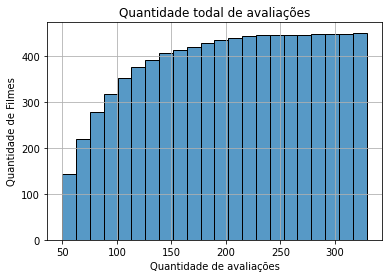

In [24]:
sns.histplot(data = movies_50mais_avaliacoes
             ,cumulative= True
             , x = 'QTD_AVALIACOES'
             )
plt.title ("Quantidade todal de avaliações")
plt.xlabel('Quantidade de avaliações')
plt.ylabel('Quantidade de Filmes')
#plt.axis([50,300,0,15])
plt.grid(True)
plt.show()

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [25]:
nota_limite_20_porcento = movies["MEDIA_AVALIACOES"].quantile(0.8)

print('80 porcento dos filmes possuem uma nota de até %.2f ou 20 porncento dos filmes tem nota maior.' % nota_limite_20_porcento)

80 porcento dos filmes possuem uma nota de até 4.00 ou 20 porncento dos filmes tem nota maior.


In [ ]:

'''
Na afirmação acima é importante levar em consideraçõies que possuem filmes com notas altas devido à baixa 
quantidade de avaliações. O que a depender do  objetivo da análise pode levar a interpretações equivocadas.
Portanto, para limpar os dados, podemos considerar como notas relevantes, apenas os filmes que possuem mais de 50
avaliações (movies_50mais_avaliacoes), desta forma a media de notas passa a ser.
'''

nota_limite_20_porcento = movies_50mais_avaliacoes["MEDIA_AVALIACOES"].quantile(0.8)

print('80 porcento dos filmes com notas relevantes possuem uma média de até %.2f ou 20 porncento dos filmes tem nota maior.' % nota_limite_20_porcento)

80 porcento dos filmes com notas relevantes possuem uma média de até 3.99 ou 20 porncento dos filmes tem nota maior.


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0, 0.5, 'Quantidade de Filmes')

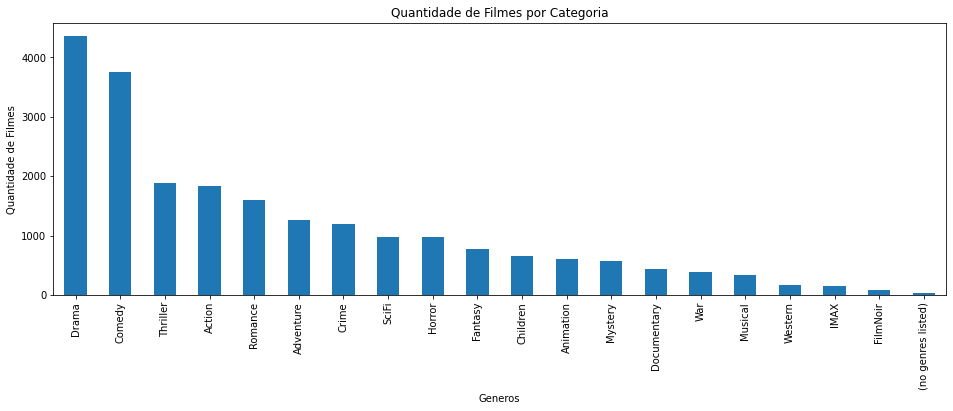

In [26]:
generos_qtd.plot(
    kind='bar', 
    title='Quantidade de Filmes por Categoria',
    figsize=(16,5))

plt.xlabel('Generos')
plt.ylabel('Quantidade de Filmes')

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [27]:
resposta = ', '.join(list(generos_qtd.head(5).index))
print(f'Os gêneros que mais aparecem nos filmes, respectivamente do mais frequente ao menos, são: {resposta}')

Os gêneros que mais aparecem nos filmes, respectivamente do mais frequente ao menos, são: Drama, Comedy, Thriller, Action, Romance


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

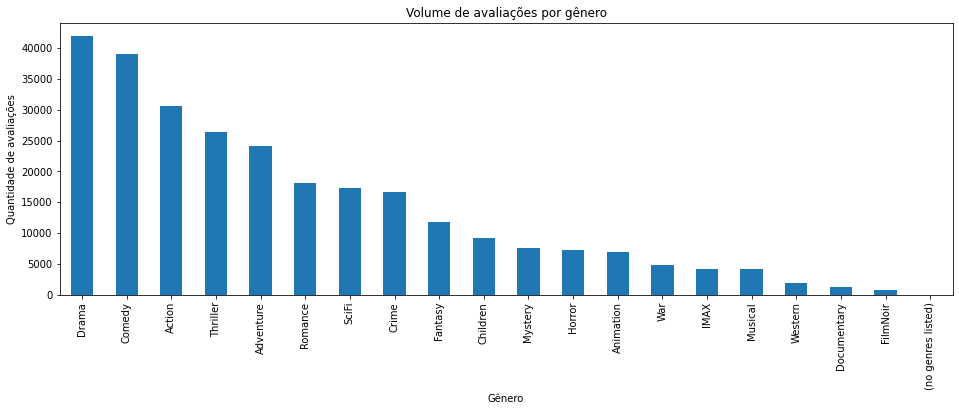

In [28]:
votos_por_genero_por_filme.sum().sort_values(ascending = False).plot(
    kind='bar', 
    title='Volume de avaliações por gênero',
    figsize=(16,5))
plt.xlabel('Gênero')
plt.ylabel('Quantidade de avaliações')
#plt.axis([50,300,0,15])
#plt.grid(True)
plt.show()

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [29]:
votos_filme_e_generos = votos_generos / generos_qtd
votos_filme_e_generos

(no genres listed)     1.382353
Action                16.758753
Adventure             19.129850
Animation             11.436989
Children              13.867470
Comedy                10.397497
Crime                 13.912427
Documentary            2.770455
Drama                  9.614309
Fantasy               15.191271
FilmNoir              10.000000
Horror                 7.455010
IMAX                  26.234177
Musical               12.389222
Mystery               13.392670
Romance               11.355890
SciFi                 17.594898
Thriller              13.966209
War                   12.719895
Western               11.556886
dtype: float64

Text(0, 0.5, 'Média de votos por filme')

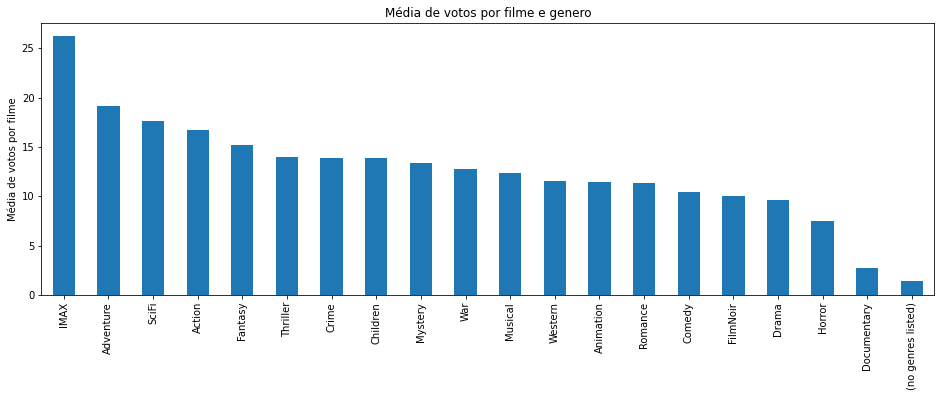

In [30]:
votos_filme_e_generos.sort_values(ascending = False).plot(
    kind='bar', 
    title='Média de votos por filme e genero',
    figsize=(16,5))
plt.ylabel('Média de votos por filme')

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`? Obs: Como os filmes de gênero IMAX tiveram um comportamento interessante no último gráfico, uma avaliação entre o gêrenos Action e IMAX será mais pertinente neste caso.

Os filmes do gênero ação está entre os três gêneros mais frequentes na amostra, portanto, é natural esperar um grande volume de avaliações. Por outro lado, na amostra há poucos filmes do gênero IMAX, entretanto, estes poucos tiveram um grande volume de votos, deixando o gêrero IMAX em destaque no último gráfico "Votos por filme e gênero", fato que pode refletir um grande engajamento das pessoas em relação aos filmes do gênero IMAX.

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

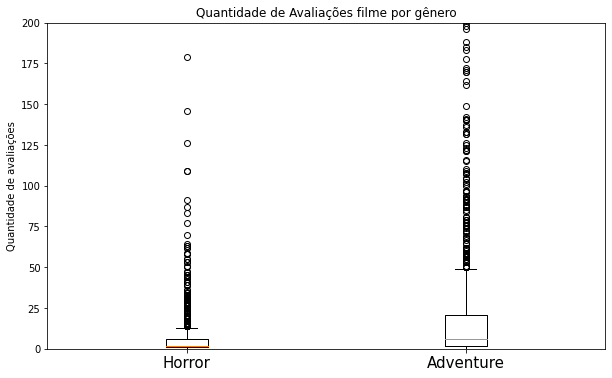

In [31]:
exibicoes = ['Horror','Adventure']
data = [movies.query("Horror == 1")['QTD_AVALIACOES'].values
        ,movies.query("Adventure == 1")['QTD_AVALIACOES'].values] 

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data)
ax.set_ylim(0, 200)
ax.set_xticklabels(np.repeat(exibicoes, 1),
                    rotation=0, fontsize=15)

plt.ylabel('Quantidade de avaliações')
plt.title('Quantidade de Avaliações filme por gênero')
plt.show()

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

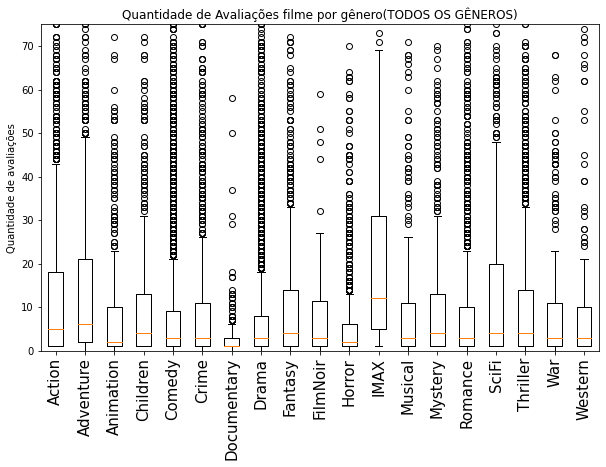

In [32]:
exibicoes = list(generos.columns)
data =[ 
         movies.query(exibicoes[1] + " == 1")['QTD_AVALIACOES'].values,movies.query(exibicoes[2] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[3] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[4] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[5] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[6] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[7] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[8] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[9] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[10] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[11] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[12] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[13] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[14] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[15] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[16] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[17] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[18] + " == 1")['QTD_AVALIACOES'].values
        ,movies.query(exibicoes[19] + " == 1")['QTD_AVALIACOES'].values

        
      ]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data)
ax.set_ylim(0, 75)
ax.set_xticklabels(np.repeat(exibicoes[1:], 1),
                    rotation=90, fontsize=15)

plt.ylabel('Quantidade de avaliações')
plt.title('Quantidade de Avaliações filme por gênero(TODOS OS GÊNEROS)')
plt.show()

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

Solução: Primeiro é necessário definir o parâmetro avaliativo que pode nos dizer de maneira aproximada o retorno financeiro de determinado filme. Neste caso foi escolhido o indicador de quantidade de avaliações por filme, adotando a premissa de que os filmes mais avaliados possuem maior engajamento, portanto, possuem maiores chances de se popularizarem e maior rentabilidade. Avaliando exclusivamente entre os gêneros de Horror e Adventure, o que possui maior probabilidade de se popularizar seria o de aventura, já que possui uma distribuição melhor do que os filmes de horror, onde 75% dos filmes tem uma quantidade de avaliações que se equipara com a mediana dos filmes de aventura em relação à quantidade de avaliações.

In [33]:
mediana_adventure = movies.query("Adventure == 1")['QTD_AVALIACOES'].quantile(0.50)
terceiro_quartil_horror = movies.query("Horror == 1")['QTD_AVALIACOES'].quantile(0.75)
print(f"75% dos filmes de Horror possuem até {terceiro_quartil_horror} avaliações. 50% dos filmes de Aventura possuem até {mediana_adventure} avaliações")

75% dos filmes de Horror possuem até 6.0 avaliações. 50% dos filmes de Aventura possuem até 6.0 avaliações


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

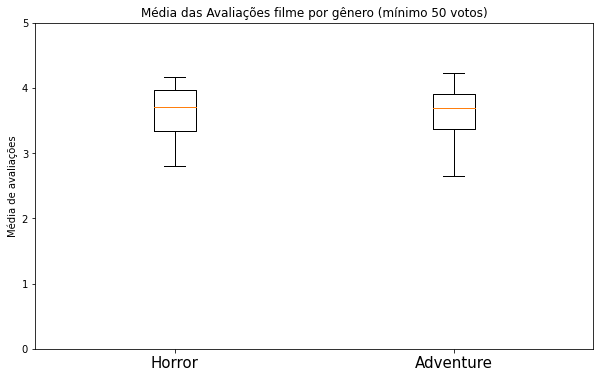

In [34]:
exibicoes = ['Horror','Adventure']
data = [movies_50mais_avaliacoes.query("Horror == 1")['MEDIA_AVALIACOES'].values
        ,movies_50mais_avaliacoes.query("Adventure == 1")['MEDIA_AVALIACOES'].values] 

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data)
ax.set_ylim(0, 5)
ax.set_xticklabels(np.repeat(exibicoes, 1),
                    rotation=0, fontsize=15)

plt.ylabel('Média de avaliações')
plt.title('Média das Avaliações filme por gênero (mínimo 50 votos)')
plt.show()

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

Solução: As medianas, máximos e mínimos dos generos aventura e horror são muito próximos, portanto, pelo gráfico de bloxpot não fica muito evidente qual seria a melhro decisão a ser tomada. Entretanto, levando em consideração que o Bloxplot é a única referência possível para responder essa pergunta, eu escolheria Adventure, que possui um máximo da média de avaliações sutilmente superior aos filmes de horror.



## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

Como já supracitado, com as vizualizações que temos a disposição não foi possível definir de maneira acertiva entre Horror e Adventure qual filme teria uma probabilidade de sucesso maior em crítica, portanto, sigo com a minha opinião anterior favorável ao gênero Adventure, apenas para não deixar esse tópico sem resposta. Quanto à popularidade, é nítido a diferença entre os gêneros, com Adventure levando vantagem, pois, como já avaliado "75% dos filmes de Horror possuem até 6 avaliações enquanto 50% dos filmes de Aventura possuem até 6 avaliações.". Portanto a melhor opção é o gênero Adventure.

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [40]:
votos_generos.head(2)

Drama     41928
Comedy    39053
dtype: int64

In [41]:

movies_50mais_avaliacoes.query("Drama == 1 or Comedy == 1").sort_values(by = "MEDIA_AVALIACOES", ascending = False).head(5)

,FILME_ID,TITULO,ANO_LANCAMENTO,QTD_AVALIACOES,MEDIA_AVALIACOES,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
FILME_ID,,,,,,,,,,,,,,,,,,,,,,,,,
318,318,"Shawshank Redemption, The (1994)",1994.0,317,4.429022,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
858,858,"Godfather, The (1972)",1972.0,192,4.289062,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2959,2959,Fight Club (1999),1999.0,218,4.272936,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1276,1276,Cool Hand Luke (1967),1967.0,57,4.271930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
750,750,Dr. Strangelove or: How I Learned to Stop Worr...,1964.0,97,4.268041,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [42]:
top2_mais_correlacionados = list(correlacao_mediaavaliacoes_generos.head(2).index)
top2_menos_correlacionados = list(correlacao_mediaavaliacoes_generos.tail(2).index)
print(f"Os generos que mais se correlacionam com a media de avaliações são {top2_mais_correlacionados} \n Os que menos se correlacionam são: {top2_menos_correlacionados}")

Os generos que mais se correlacionam com a media de avaliações são ['Drama', 'Documentary'] 
 Os que menos se correlacionam são: ['Action', 'Horror']


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [43]:
top2_mais_correlacionados = list(correlacao_qtdavaliacoes_generos.head(2).index)
top2_menos_correlacionados = list(correlacao_qtdavaliacoes_generos.tail(2).index)
print(f"Os generos que mais se correlacionam com a quantidade de avaliações são {top2_mais_correlacionados} \n Os que menos se correlacionam são: {top2_menos_correlacionados}")

Os generos que mais se correlacionam com a quantidade de avaliações são ['Adventure', 'Action'] 
 Os que menos se correlacionam são: ['Horror', 'Documentary']


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

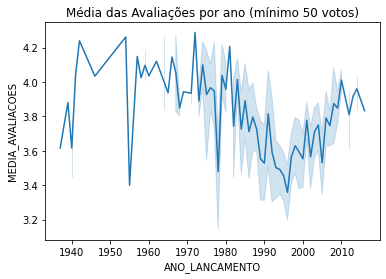

In [45]:
sns.lineplot(data = movies_50mais_avaliacoes[["ANO_LANCAMENTO","MEDIA_AVALIACOES"]], x = "ANO_LANCAMENTO", y = "MEDIA_AVALIACOES")
plt.title('Média das Avaliações por ano (mínimo 50 votos)')
plt.show()

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [46]:
movies_50mais_avaliacoes[["ANO_LANCAMENTO","MEDIA_AVALIACOES"]].corr()

,ANO_LANCAMENTO,MEDIA_AVALIACOES
ANO_LANCAMENTO,1.000000,-0.159146
MEDIA_AVALIACOES,-0.159146,1.000000


Solução (explicação)
As variáveis Ano Lançamento e Média de Avaliações possuem uma correlação negativa muito fraca. O Problema dessa análise é que os dados foram coletados em um ano específico, e isso implica diretamente na média das avaliações, pois, se a mesma pesquisa for feita após algumas decadas, a média dos filmes atuais será diferente, pois já estariam ultrapassados, o mesmo pode ter acontecido com os filmes lançados no passado.


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

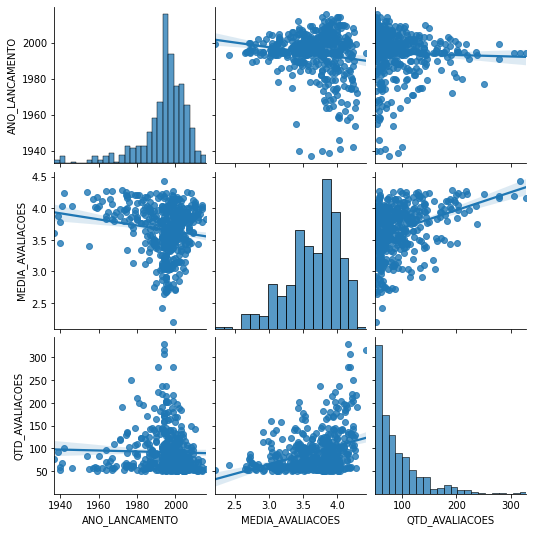

In [47]:
# solução

sns.pairplot(data = movies_50mais_avaliacoes[["ANO_LANCAMENTO","MEDIA_AVALIACOES","QTD_AVALIACOES"]], kind="reg")


## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

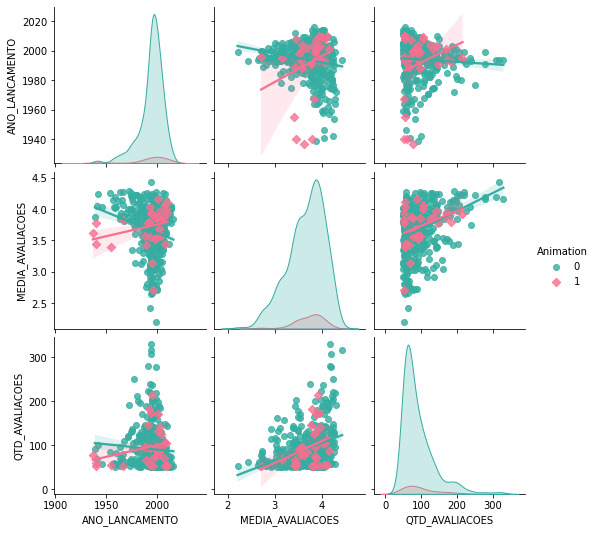

In [48]:
sns.pairplot(
              data = movies_50mais_avaliacoes
              , kind="reg"
              ,vars = ["ANO_LANCAMENTO","MEDIA_AVALIACOES","QTD_AVALIACOES"]
              ,hue = "Animation"
              ,palette = sns.husl_palette(2, h=.5)
              ,markers=["o", "D"]
             )

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

- A regressão mostra uma nítida evolução. Com notas médias superiores ao decorrer dos anos.

- Assim como a média das avaliações. A quantidade de avaliações também cresce ao decorrer dos anos.

- Por outro lado, as demais categorias, demonstram um comportamento distinto. As médias das avalações tiveram um decrescimento ao passar dos anos, enquanto a quantidade de avaliações segue com uma baixa variações ao passar dos anos.

- Hipótese: Apesar dá média das notas terem reduzido ao passar dos anos no geral, alguns gêneros podem mostrar comportamentos destoântes, como por exemplo o gênero de animação que se favorece bastante com os avanços das tecnologias de animação 3D.

#Teste de hipóteses:

### - Os filmes com as melhores médias são os melhores filmes? Como posso fazer uma análise mias profunda e classificar os melhores filmes?

Uma maneira para realizar uma análise mais profunda acerca do comportamento de determinado fenômeno é por meio dos testes estatísticos, que partindo de uma amostra que atenda aos requisitos exigidos por cada teste, podem auxiliar na modelagem do fenômeno, predição de comportamento futuro, dentre outros indicadores.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

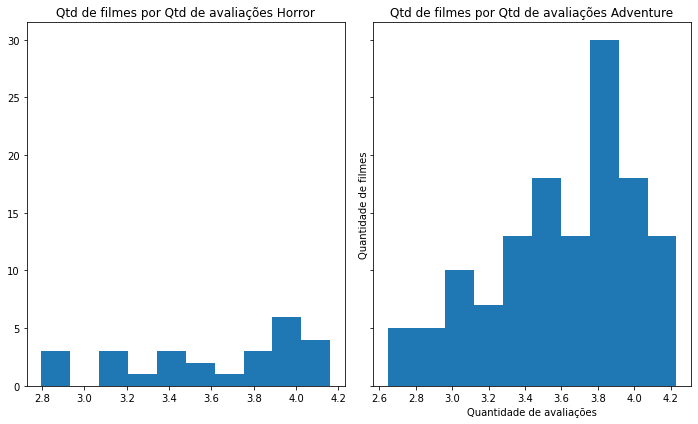

In [57]:
exibicao = ['Horror','Adventure']


x = movies_50mais_avaliacoes.query("Horror == 1")['MEDIA_AVALIACOES'].values
y = movies_50mais_avaliacoes.query("Adventure == 1")['MEDIA_AVALIACOES'].values

fig, axs = plt.subplots(1, 2,figsize=(10, 6), sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x)
axs[0].set_title('Qtd de filmes por Qtd de avaliações Horror')

axs[1].hist(y)
axs[1].set_title('Qtd de filmes por Qtd de avaliações Adventure')
plt.ylabel('Quantidade de filmes')
plt.xlabel('Quantidade de avaliações')
plt.show()

In [70]:
from scipy import stats
# pelo fato da quantidade de amostras serem muito baixas, o teste de homalidade utilizado será do de Shapiro-Wilk.

In [69]:
significancia = 0.05
stat, p_valor = stats.shapiro(movies_50mais_avaliacoes.query("Horror == 1")["MEDIA_AVALIACOES"])
print(f'stat = {stat} , p-valor = {p_valor}')
if p_valor <= significancia:
  print('A amostra das avaliações dos filmes do gênero Horror, não é proveniente de uma distrinuição normal com um nível de significânicia de 5%')
else:
  print('A amostra das avaliações dos filmes do gênero Horror, é proveniente de uma distrinuição normal com um nível de significânicia de 5%')

stat = 0.9116240739822388 , p-valor = 0.02872653678059578
A amostra das avaliações dos filmes do gênero Horror, não é proveniente de uma distrinuição normal com um nível de significânicia de 5%


In [67]:
significancia = 0.05
stat, p_valor = stats.shapiro(movies_50mais_avaliacoes.query("Adventure == 1")["MEDIA_AVALIACOES"])
print(f'stat = {stat} , p-valor = {p_valor}')
if p_valor <= significancia:
  print('A amostra das avaliações dos filmes do gênero Aventura, não é proveniente de uma distrinuição normal com um nível de significânicia de 5%')
else:
  print('A amostra das avaliações dos filmes do gênero Aventura, é proveniente de uma distrinuição normal com um nível de significânicia de 5%')

stat = 0.9532154202461243 , p-valor = 0.00017858231149148196
A amostra das avaliações dos filmes do gênero Aventura, não é proveniente de uma distrinuição normal com um nível de significânicia de 5%


## Pergunta: Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.

Sim. Ambos os gêneros não provém de uma distribuição normal com 5% de significância.

# EXPLORE

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

## Média de avaliações por ano para Horror e Adventure

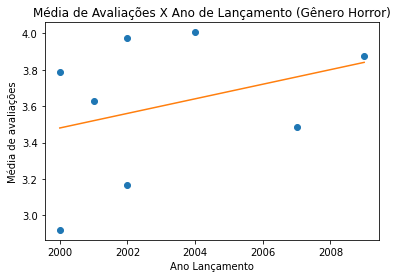

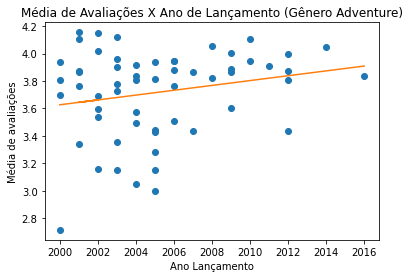

In [ ]:
x = movies_50mais_avaliacoes.query("Horror == 1 and ANO_LANCAMENTO >= 2000")['ANO_LANCAMENTO']
y = movies_50mais_avaliacoes.query("Horror == 1 and ANO_LANCAMENTO >= 2000")['MEDIA_AVALIACOES']
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel('Ano Lançamento')
plt.ylabel('Média de avaliações')
plt.title('Média de Avaliações X Ano de Lançamento (Gênero Horror)')
plt.show()


x = movies_50mais_avaliacoes.query("Adventure == 1 and ANO_LANCAMENTO >= 2000")['ANO_LANCAMENTO']
y = movies_50mais_avaliacoes.query("Adventure == 1 and ANO_LANCAMENTO >= 2000")['MEDIA_AVALIACOES']
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel('Ano Lançamento')
plt.ylabel('Média de avaliações')
plt.title('Média de Avaliações X Ano de Lançamento (Gênero Adventure)')
plt.show()

Considerações: O intuito da vizualização destes indicadores era tentar responder de maneira acertiva a pergunta sobre qual gênero dentre Horror e Adventure teria maior probabilidade de ser sucesso em críticas, analizando o desempenho destes filmes em um período mais recente. Entretanto, após analizar todos os indicadores apresentados neste projeto, é possível concluir que não existe uma correlação entre o gênero e a nota que será atribuída ao filme. sendo a crítica um fato que depende de outros fatores que não estão presentes em nossa base, como direção, valor investido dentre outros.

## Análise de gênero dos filmes que não foram avaliados

In [72]:
sem_avaliacoes = movies['MEDIA_AVALIACOES'].isnull()
sem_avaliacoes.name = "SEM_AVALIACAO"
movies_sem_avaliacao = movies.join(sem_avaliacoes).query('SEM_AVALIACAO == True')

In [73]:
generos_sem_avaliacao = movies_sem_avaliacao[movies_sem_avaliacao.columns[5:25]].sum().sort_values(ascending = False)

Text(0, 0.5, 'Quantidade de Filmes')

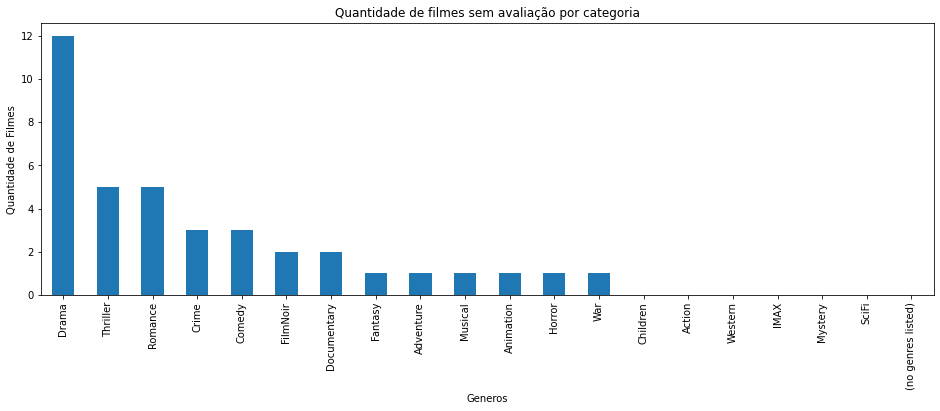

In [74]:
generos_sem_avaliacao.plot(
    kind='bar', 
    title='Quantidade de filmes sem avaliação por categoria',
    figsize=(16,5))

plt.xlabel('Generos')
plt.ylabel('Quantidade de Filmes')

Considerações: Estes indicadores possuem o intuito apenas de tentar modeladar o padrão dos filmes que não possuem notas, e tentar encontrar uma razão para tal. Entretanto, a única conclusão que foi possível extrair desta amostra é que os filmes de gênero drama são de longe os filmes que possuem mais casos não avaliados no MovieLens.

# AGRADECIMENTOS

Gostaria de agradecer toda a Equipe Alura pela excelente formação oferecida. O acervo imenso e diversificado de cursos aliado à exelente didática dos professores foram capazes de oferecer uma uma experiência incrível. Com certeza hoje me sinto um profissional muito mais preparado para o mercado em relação a quando iniciei os cursos na Alura. foi um desenvolvimento incrível em um curtíssimo período de tempo, e grande parte disso foi graças a vocês! Parabéns a todos pelo trabalho entregue!
